In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import numpy as np
import datetime
from sklearn.utils import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import plot_importance as pi
import pickle

In [2]:
data = pd.read_csv('../data/embedded_datasets/metrics_dataset.csv')
x = data.drop(columns=['label', 'sample_id', 'severity'])

In [3]:
data.head()

,sample_id,severity,constructor,line,cbo,wmc,rfc,loc,returnsQty,variablesQty,...,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty,hasJavaDoc,from_project,label
0,4256584,major,0,65,1,1,5,7,0,0,...,0,0,0,0,32,1,0,1,1,1
1,8922371,major,0,733,3,15,14,71,0,1,...,3,0,0,0,5,1,0,0,1,1
2,8653310,major,0,105,10,7,73,24,1,6,...,3,0,0,0,32,1,0,1,1,1
3,4734605,major,0,929,6,4,28,20,0,6,...,1,0,0,1,39,2,2,0,0,1
4,4514232,major,0,100,15,23,19,65,0,20,...,3,0,0,0,58,33,0,0,1,1


In [4]:
features_importance = np.zeros(len(x.columns))
model_path_base = '../data/saved_models/metrics_dataset_'
for rand_seed in range(51):
    model_path = model_path_base + str(rand_seed) + '.pkl'
    with open(model_path, "rb") as input_file:
        pipeline = pickle.load(input_file)
    
    model = pipeline[1]
#     print(model)
    feature_importances = model.feature_importances_
    ind = np.argpartition(feature_importances, -5)[-5:]
    k = ind[np.argsort(feature_importances[ind])][::-1]
    features_importance[k] = features_importance[k] + 1

In [5]:
ind = np.argpartition(features_importance, -10)[-10:]
k = ind[np.argsort(features_importance[ind])][::-1]
k

array([ 9,  4,  5,  2,  7, 20,  8,  3, 18, 25])

In [6]:
features_importance[k]

array([51., 48., 44., 40., 25., 18.,  8.,  4.,  4.,  3.])

In [7]:
x.columns[k]

Index(['methodsInvokedQty', 'rfc', 'loc', 'cbo', 'variablesQty',
       'maxNestedBlocksQty', 'parametersQty', 'wmc', 'assignmentsQty',
       'modifiers'],
      dtype='object')

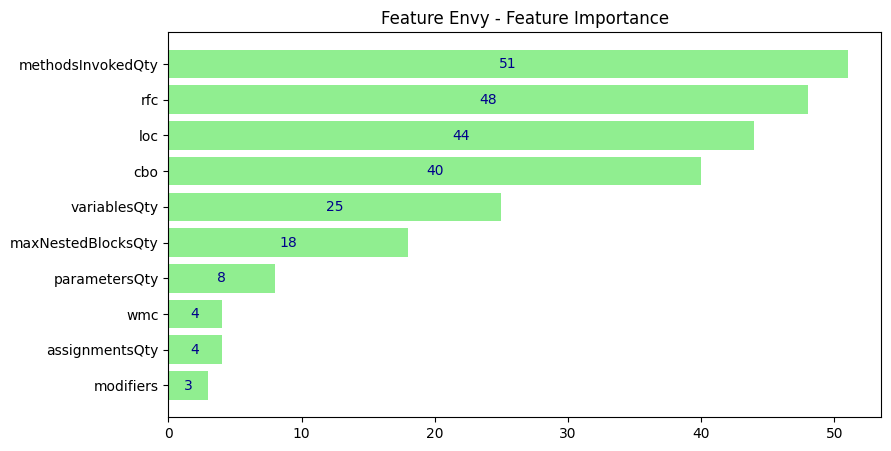

In [8]:
fig, ax = plt.subplots(figsize=(9.2, 5))
plt.barh(range(10), width=features_importance[k][::-1], tick_label=x.columns[k[::-1]], color='lightgreen')
widths = features_importance[k][::-1]
xcenters = widths / 2
for y, (x_ax, c) in enumerate(zip(xcenters, widths)):
            ax.text(x_ax, y, str(int(c)), ha='center', va='center',
                    color='darkblue')
plt.title("Feature Envy - Feature Importance")
plt.show()